In [1]:
import numpy as np
from matplotlib.pyplot import *
from spectral import imshow, view_cube
import spectral.io.envi as envi
from pysptools import spectro, noise 

In [30]:
find_index = lambda x, wvls: np.argmin(np.abs(wvls - x), axis = 0)

In [4]:
fpath = r'D:/Data/Data_HSI/CRAS/HySpex/Refletancia/'
fname_wref = r'Refletancia - Branco/Refletancia - Branco_01_Mjolnir_S620_SN7087_raw_rad_keystone_smile_float32'
fname_dref = r'Refletancia - Preto/Refletancia - Preto_01_Mjolnir_S620_SN7087_raw_rad_keystone_smile_float32'
# fname_dref = r'3 - Vidro Verde/conversion_output/2024-02-28T12_53_51+0000_dark_frames'
fname_ref = r'Refletancia - Santo Antonio/Refletancia - Santo Antonio_01_Mjolnir_S620_SN7087_raw_rad_keystone_smile_float32'

In [5]:
white_ref = envi.open(fpath + fname_wref + '.hdr', fpath + fname_wref + '.img')
dark_ref = envi.open(fpath + fname_dref + '.hdr', fpath + fname_dref + '.img')
data_ref = envi.open(fpath + fname_ref + '.hdr', fpath + fname_ref + '.img')

In [27]:
white_nparr = np.array(white_ref.load())
i_white = white_nparr[white_nparr[:, :, 100] > 0.016].mean(axis = 0)
dark_nparr = np.array(dark_ref.load())
i_dark = dark_nparr[dark_nparr[:, :, 100] < 0.00030].mean(axis = 0)
data_nparr = np.array(data_ref.load())

In [37]:
corrected_nparr = ((data_nparr - i_dark)/(i_white - i_dark))[390:1250, 30:350]
bands = np.array(data_ref.bands.centers)

In [41]:
exposure_time = 20e-3
specim_fps = 1/exposure_time
stage_speed = 5e-3
y_size = corrected_nparr.shape[0]/specim_fps*stage_speed * 1e2 #cm
x_size = 0.09* 1e2 #cm

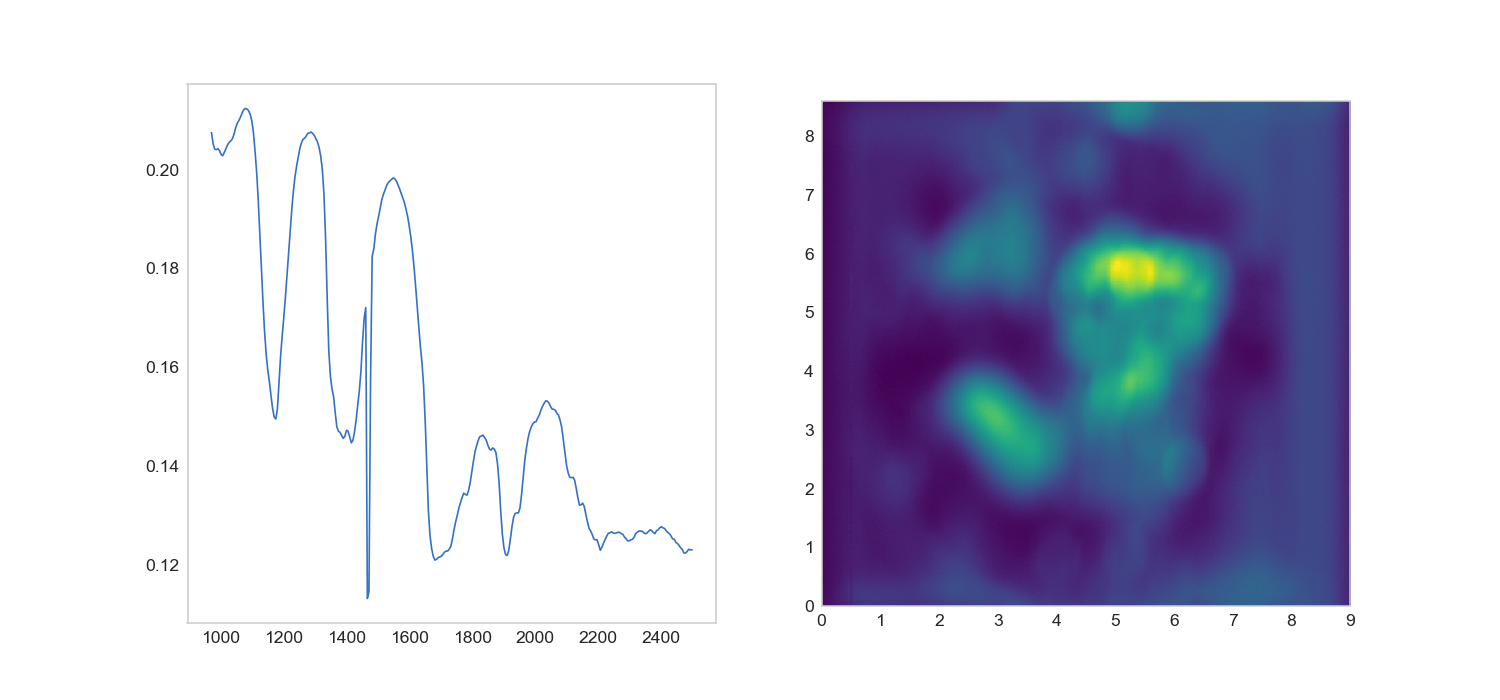

In [52]:
fig, ax = subplots(1, 2, figsize = (15, 7))

w = 1552

axs = ax[0]
axs.plot(bands, corrected_nparr.mean(axis = (0, 1)))
axs.grid(False)

axs = ax[1]
axs.imshow(corrected_nparr[:, :, find_index(w, bands)], extent = (0, x_size, 0, y_size), interpolation = 'nearest')
axs.grid(False)